In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
AQ = pd.read_csv('../../data/raw/AirQualityUCI.csv', sep=";")

In [4]:
AQ

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
dc = AQ.drop(columns=["Unnamed: 15","Unnamed: 16", "NMHC(GT)"])
dc
# Dropped useless columns

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,"2,6",1360.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578"
1,10/03/2004,19.00.00,2,1292.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255"
2,10/03/2004,20.00.00,"2,2",1402.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502"
3,10/03/2004,21.00.00,"2,2",1376.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867"
4,10/03/2004,22.00.00,"1,6",1272.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
rename = dc.rename(columns={"CO(GT)":"CO", "PT08.S1(CO)": "Tin Oxide", "NMHC(GT)": "Avg. Benzene", "PT08.S2(NMHC)": "Titania", "NOx(GT)": "Avg. NO in ppb", "PT08.S3(NOx)": "Tungsten Oxide", "NO2(GT)": "NO2", "PT08.S4(NO2)": "Hr Avg. Tungsten Oxide", "PT08.S5(O3)": "Indium Oxide" })
rename
#Renamed all of the columns

,Date,Time,CO,Tin Oxide,C6H6(GT),Titania,Avg. NO in ppb,Tungsten Oxide,NO2,Hr Avg. Tungsten Oxide,Indium Oxide,T,RH,AH
0,10/03/2004,18.00.00,"2,6",1360.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578"
1,10/03/2004,19.00.00,2,1292.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255"
2,10/03/2004,20.00.00,"2,2",1402.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502"
3,10/03/2004,21.00.00,"2,2",1376.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867"
4,10/03/2004,22.00.00,"1,6",1272.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
cleaned_AC = rename.dropna().reset_index(drop=True)
cleaned_AC
# Dropped all of the rows with NaN's

,Date,Time,CO,Tin Oxide,C6H6(GT),Titania,Avg. NO in ppb,Tungsten Oxide,NO2,Hr Avg. Tungsten Oxide,Indium Oxide,T,RH,AH
0,10/03/2004,18.00.00,"2,6",1360.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578"
1,10/03/2004,19.00.00,2,1292.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255"
2,10/03/2004,20.00.00,"2,2",1402.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502"
3,10/03/2004,21.00.00,"2,2",1376.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867"
4,10/03/2004,22.00.00,"1,6",1272.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,04/04/2005,10.00.00,"3,1",1314.0,"13,5",1101.0,472.0,539.0,190.0,1374.0,1729.0,"21,9","29,3","0,7568"
9353,04/04/2005,11.00.00,"2,4",1163.0,"11,4",1027.0,353.0,604.0,179.0,1264.0,1269.0,"24,3","23,7","0,7119"
9354,04/04/2005,12.00.00,"2,4",1142.0,"12,4",1063.0,293.0,603.0,175.0,1241.0,1092.0,"26,9","18,3","0,6406"
9355,04/04/2005,13.00.00,"2,1",1003.0,"9,5",961.0,235.0,702.0,156.0,1041.0,770.0,"28,3","13,5","0,5139"


In [8]:
df1 = cleaned_AC.loc[:, ["Tin Oxide", "Titania", "Tungsten Oxide", "Indium Oxide", "T"]]
df1

,Tin Oxide,Titania,Tungsten Oxide,Indium Oxide,T
0,1360.0,1046.0,1056.0,1268.0,"13,6"
1,1292.0,955.0,1174.0,972.0,"13,3"
2,1402.0,939.0,1140.0,1074.0,"11,9"
3,1376.0,948.0,1092.0,1203.0,"11,0"
4,1272.0,836.0,1205.0,1110.0,"11,2"
...,...,...,...,...,...
9352,1314.0,1101.0,539.0,1729.0,"21,9"
9353,1163.0,1027.0,604.0,1269.0,"24,3"
9354,1142.0,1063.0,603.0,1092.0,"26,9"
9355,1003.0,961.0,702.0,770.0,"28,3"


In [9]:
df = df1.replace(',','.', regex=True)

In [10]:
df
# replaced commas separating numbers in the temp and humidity columns

,Tin Oxide,Titania,Tungsten Oxide,Indium Oxide,T
0,1360.0,1046.0,1056.0,1268.0,13.6
1,1292.0,955.0,1174.0,972.0,13.3
2,1402.0,939.0,1140.0,1074.0,11.9
3,1376.0,948.0,1092.0,1203.0,11.0
4,1272.0,836.0,1205.0,1110.0,11.2
...,...,...,...,...,...
9352,1314.0,1101.0,539.0,1729.0,21.9
9353,1163.0,1027.0,604.0,1269.0,24.3
9354,1142.0,1063.0,603.0,1092.0,26.9
9355,1003.0,961.0,702.0,770.0,28.3


In [15]:
#df.to_csv("cleaned_data")
#converted it to csv to delete all missing value rows manually because pandas was not responding
dff = pd.read_csv("finalcleaned.csv")
dff

,Unnamed: 0,Tin Oxide,Titania,Tungsten Oxide,Indium Oxide,T
0,0,1360,1046,1056,1268,13.6
1,1,1292,955,1174,972,13.3
2,2,1402,939,1140,1074,11.9
3,3,1376,948,1092,1203,11.0
4,4,1272,836,1205,1110,11.2
...,...,...,...,...,...,...
8986,9352,1314,1101,539,1729,21.9
8987,9353,1163,1027,604,1269,24.3
8988,9354,1142,1063,603,1092,26.9
8989,9355,1003,961,702,770,28.3


In [22]:
dfinal = dff.drop(columns=["Unnamed: 0"])
dfinal

,Tin Oxide,Titania,Tungsten Oxide,Indium Oxide,T
0,1360,1046,1056,1268,13.6
1,1292,955,1174,972,13.3
2,1402,939,1140,1074,11.9
3,1376,948,1092,1203,11.0
4,1272,836,1205,1110,11.2
...,...,...,...,...,...
8986,1314,1101,539,1729,21.9
8987,1163,1027,604,1269,24.3
8988,1142,1063,603,1092,26.9
8989,1003,961,702,770,28.3


## **EDA**

In [23]:
dfinal.head()

,Tin Oxide,Titania,Tungsten Oxide,Indium Oxide,T
0,1360,1046,1056,1268,13.6
1,1292,955,1174,972,13.3
2,1402,939,1140,1074,11.9
3,1376,948,1092,1203,11.0
4,1272,836,1205,1110,11.2


In [24]:
dfinal.nunique(axis=0)

Tin Oxide         1041
Titania           1245
Tungsten Oxide    1221
Indium Oxide      1743
T                  436
dtype: int64

In [25]:
dfinal.describe(include='all')

,Tin Oxide,Titania,Tungsten Oxide,Indium Oxide,T
count,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000
mean,1099.833166,939.153376,835.493605,1022.906128,18.317829
std,217.080037,266.831429,256.817320,398.484288,8.832116
min,647.000000,383.000000,322.000000,221.000000,-1.900000
25%,937.000000,734.500000,658.000000,731.500000,11.800000
50%,1063.000000,909.000000,806.000000,963.000000,17.800000
75%,1231.000000,1116.000000,969.500000,1273.500000,24.400000
max,2040.000000,2214.000000,2683.000000,2523.000000,44.600000


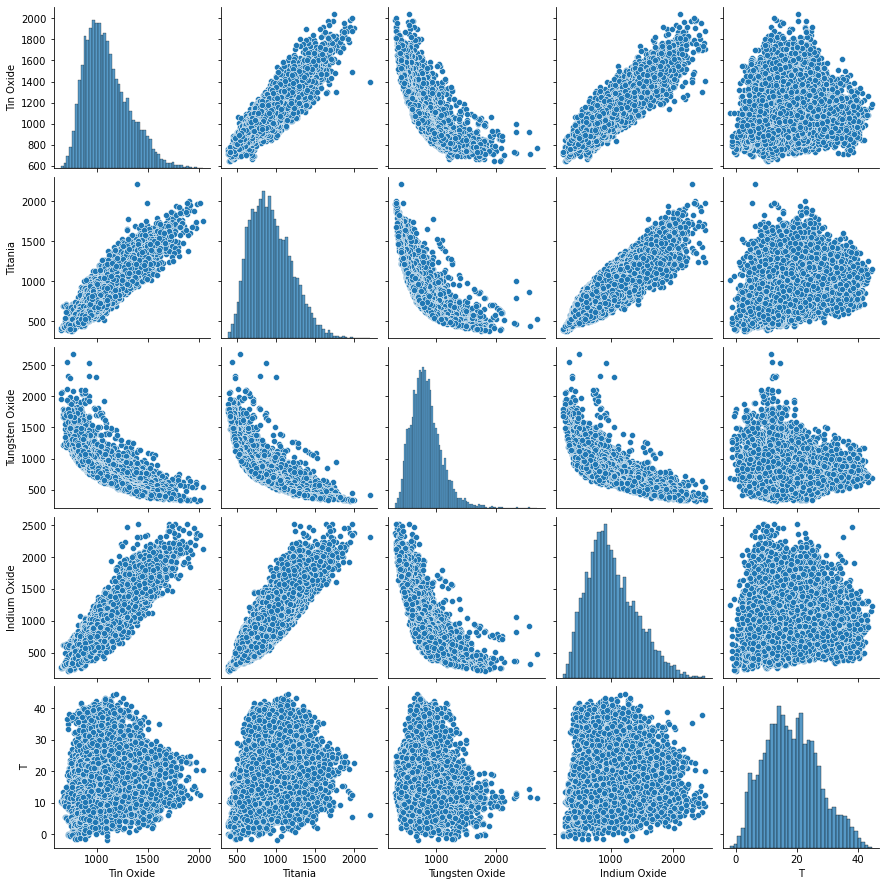

In [26]:
sns.pairplot(dfinal)

In [28]:
correlation_matrix = dfinal.corr()
correlation_matrix

,Tin Oxide,Titania,Tungsten Oxide,Indium Oxide,T
Tin Oxide,1.000000,0.892964,-0.771938,0.899324,0.048627
Titania,0.892964,1.000000,-0.796703,0.880578,0.241373
Tungsten Oxide,-0.771938,-0.796703,1.000000,-0.796569,-0.145112
Indium Oxide,0.899324,0.880578,-0.796569,1.000000,-0.027172
T,0.048627,0.241373,-0.145112,-0.027172,1.000000


<AxesSubplot:>

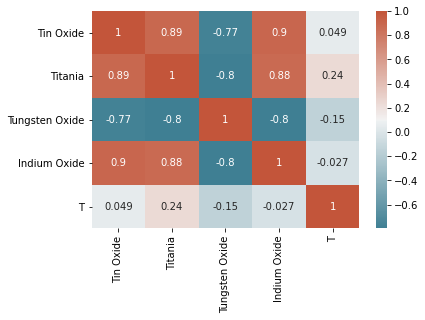

In [35]:
sns.heatmap(correlation_matrix, xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

<AxesSubplot:xlabel='T', ylabel='Tin Oxide'>

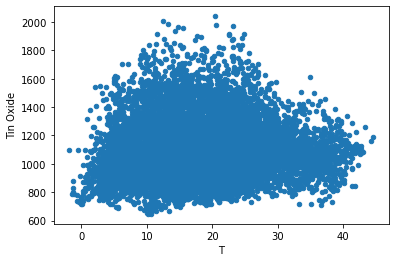

In [36]:
dfinal.plot(kind='scatter', x='T', y='Tin Oxide')

<AxesSubplot:xlabel='T', ylabel='Titania'>

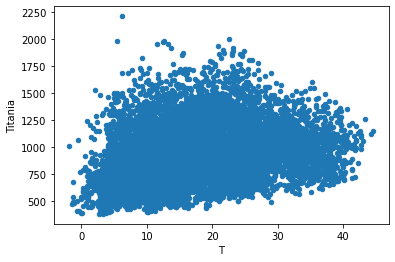

In [37]:
dfinal.plot(kind='scatter', x='T', y='Titania')

<AxesSubplot:xlabel='T', ylabel='Tungsten Oxide'>

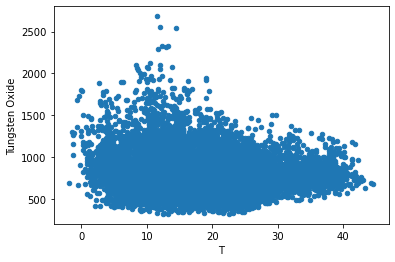

In [38]:
dfinal.plot(kind='scatter', x='T', y='Tungsten Oxide')

<AxesSubplot:xlabel='T', ylabel='Indium Oxide'>

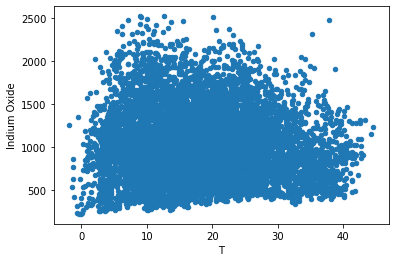

In [39]:
dfinal.plot(kind='scatter', x='T', y='Indium Oxide')

**Thus far it is very difficult to see any correlation of heavy metals causing changes in temperature as concentrations rise.**
**However, at face value it almost appears that Indium Oxide and Tungsten Oxide are associated with lower atmospheric temperatures**